# 使用多种变换方法实现图像数据增强
## 数据增强中常用的方法有：
1. 镜像（flip）、
2. 旋转（rotation）、
3. 缩放（scale）、
4. 裁剪（crop）、
5. 平移（translation）、
6. 高斯噪声（gaussion noise）、
7. 图像亮度、
8. 饱和度、
9. 对比度变化

(512, 512, 3)


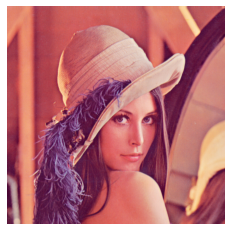

In [10]:
# 导包
import cv2
import matplotlib.pyplot as plt
# 1.读取图片lena.png
img = cv2.imread('lena.png')
print(img.shape)
# 2.显示图片
plt.imshow(img[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

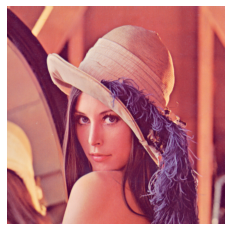

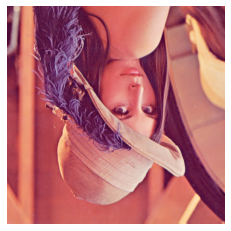

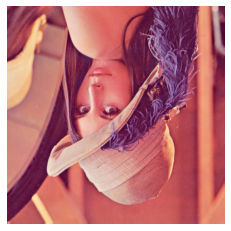

In [6]:
# 1.镜像 flip
# cv.flip(img,1,dst=None) #水平镜像
# cv.flip(img,0,dst=None) #垂直镜像
# cv.flip(img,-1,dst=None) #对角镜像
img1 = cv2.flip(img, 1, dst=None)
plt.imshow(img1[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
img2 = cv2.flip(img, 0, dst=None)
plt.imshow(img2[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
img3 = cv2.flip(img, -1, dst=None)
plt.imshow(img3[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

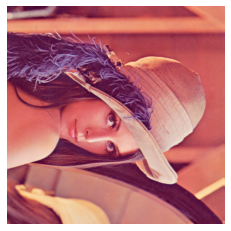

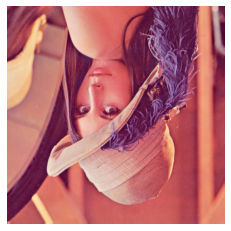

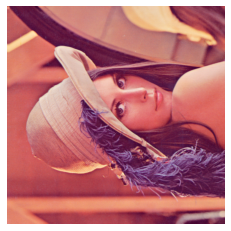

In [7]:
# 2.旋转 rotation
# imgR90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# imgR180 = cv2.rotate(img, cv2.ROTATE_180)
# imgR270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

imgR90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(imgR90[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
imgR180 = cv2.rotate(img, cv2.ROTATE_180)
plt.imshow(imgR180[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
imgR270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(imgR270[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

(224, 224, 3)


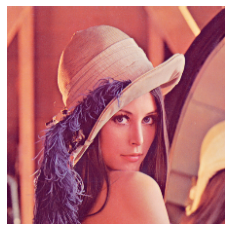

In [11]:
# 3.缩放（scale）
# cv2.resize()
# 函数resize最后一个参数interpolation表示插值方式：
# 1.INTER_NEAREST：最近邻插值
# 2.INTER_LINEAR：线性插值（默认）
# 3.INTER_AREA：区域插值
# 4.INTER_CUBIC：三次样条插值
# 5.INTER_LANCZOS4：Lanczos插值
scale = cv2.resize(img, (224, 224))
print(scale.shape)
plt.imshow(scale[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

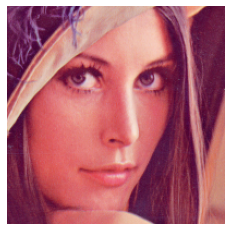

In [12]:
# 4. 裁剪（crop）
# 裁剪区域 [(200, 200), (400, 400)]
cropImg = img[200:400, 200:400]
plt.imshow(cropImg[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

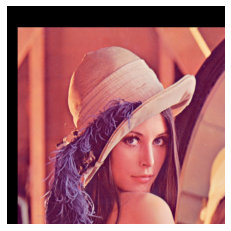

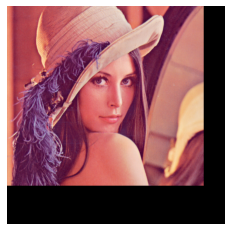

In [16]:
# 5.平移（translation）
# 将图像向右移动25像素,像下移动50像素
import numpy as np

M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(shifted[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
# 修改图像向左移动50像素，向上移动90像素
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(shifted2[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

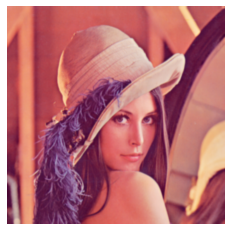

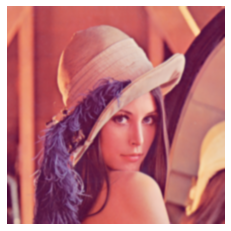

In [17]:
# 6. 高斯噪声（gaussion noise）
result_5 = cv2.GaussianBlur(img, (5, 5), 0)  # 5x5
plt.imshow(result_5[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
result_9 = cv2.GaussianBlur(img, (9, 9), 0)  # 9x9
plt.imshow(result_9[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

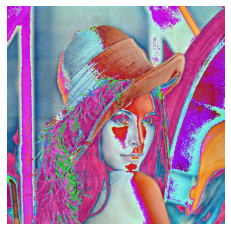

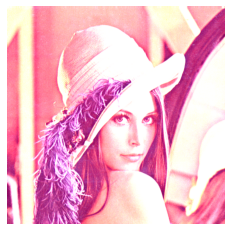

In [18]:
# 7.图像亮度  +  add
symbol_img=img+img
plt.imshow(symbol_img[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()
add_img=cv2.add(img,img)
plt.imshow(add_img[:,:,::-1])
# 去除坐标轴信息
plt.axis('off')
plt.show()

In [22]:
# 7-8-9.明亮度、饱和度、对比度
import imutils

def l_s_b(arg):
    # 图像归一化，且转换为浮点型, 颜色空间转换 BGR转为HLS
    # astype用于转换数组的数据类型
    fImg = img.astype(np.float32)
    fImg = fImg / 255.0
    # HLS空间，三个通道分别是: Hue色相、lightness明度、saturation饱和度
    # 通道0是色相、通道1是明度、通道2是饱和度
    hlsImg = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
 
    """HSL--明亮度和饱和度"""
    """
        函数 cv2.getTrackbarPos():
        功能：得到滑动条的数值
        参数：1.滑动条名字 2.窗口名
        """
    lnum = cv2.getTrackbarPos('lightness', wname)
    snum = cv2.getTrackbarPos('saturation', wname)
    cnum = cv2.getTrackbarPos('contrast', wname)
    # 1.调整亮度饱和度(线性变换)、 2.将hlsCopy[:,:,1]和hlsCopy[:,:,2]中大于1的全部截取
    hlsImg[:, :, 1] = (1.0 + lnum / float(MAX_VALUE)) * hlsImg[:, :, 1]
    hlsImg[:, :, 1][hlsImg[:, :, 1] > 1] = 1
    # HLS空间通道2是饱和度，对饱和度进行线性变换，且最大值在255以内，这一归一化了，所以应在1以内
    hlsImg[:, :, 2] = (1.0 + snum / float(MAX_VALUE)) * hlsImg[:, :, 2]
    hlsImg[:, :, 2][hlsImg[:, :, 2] > 1] = 1
    # HLS2BGR
    lsImg = cv2.cvtColor(hlsImg, cv2.COLOR_HLS2BGR)
 
    """BGR--对比度"""
    h, w, ch = lsImg.shape  # 获取shape的数值，height和width、通道
    # 新建全零图片数组img2,将height和width，类型设置为原图片的通道类型(色素全为零，输出为全黑图片)
    img2 = np.zeros([h, w, ch], lsImg.dtype)
    dst = cv2.addWeighted(lsImg, cnum, img2, 1 - cnum, 0)  # addWeighted函数说明如下
 
    # 显示调整后的效果
    cv2.imshow(wname, imutils.resize(dst, 400))

In [ ]:
 
wname = 'simple_edit'
 
if __name__ == '__main__':
 
    MAX_VALUE = 100
    cv2.namedWindow(wname, cv2.WINDOW_AUTOSIZE)
    # 第一个数为默认值，第二个数为最大范围
    cv2.createTrackbar("lightness", wname, 0, MAX_VALUE, l_s_b)
    cv2.createTrackbar("saturation", wname, 0, MAX_VALUE, l_s_b)
    cv2.createTrackbar('contrast', wname, 1, 10, l_s_b)
 
    l_s_b(0)
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()